In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
!git clone https://github.com/JCLMantilla/LabIntermedio

fatal: destination path 'LabIntermedio' already exists and is not an empty directory.


In [106]:
#### Vamos a declarar variables importantes ####
D_1=0.5 #En metros!
D_2=0.5 #En metros!
ancho=0.1/1000 #En metros!
#### Vamos a declarar las separaciones ####
d1=0.356/1000 #En metros!
d2=0.406/1000 #En metros!
d3=0.457/1000 #En metros!

data_d1=pd.read_csv(filepath_or_buffer="/content/LabIntermedio/doble_rendija_0_356.csv",delimiter=";")
data_d2=pd.read_csv(filepath_or_buffer="/content/LabIntermedio/doble_rendija_0_406.csv",delimiter=";")
data_d3=pd.read_csv(filepath_or_buffer="/content/LabIntermedio/doble_rendija_0_457.csv",delimiter=";")

#### Calculamos las medias de los 6 conteos ####

data_d1=pd.DataFrame({"x(mm)":data_d1["x(mm)"],
                      "doble":data_d1[data_d1.columns[1:7]].mean(axis=1),
                      "izquierda":data_d1[data_d1.columns[7:13]].mean(axis=1),
                      "derecha":data_d1[data_d1.columns[13:19]].mean(axis=1)
                      })
data_d2=pd.DataFrame({"x(mm)":data_d2["x(mm)"],
                      "doble":data_d2[data_d2.columns[1:7]].mean(axis=1),
                      "izquierda":data_d2[data_d2.columns[7:13]].mean(axis=1),
                      "derecha":data_d2[data_d2.columns[13:19]].mean(axis=1)
                      })
data_d3=pd.DataFrame({"x(mm)":data_d3["x(mm)"],
                      "doble":data_d3[data_d3.columns[1:7]].mean(axis=1),
                      "izquierda":data_d3[data_d3.columns[7:13]].mean(axis=1),
                      "derecha":data_d3[data_d3.columns[13:19]].mean(axis=1)
                      })

### Normalizamos las intensidades ####
for keys in data_d1.columns[1:]:
  data_d1[keys]=data_d1[keys]/data_d1[keys].max()
  data_d2[keys]=data_d2[keys]/data_d2[keys].max()
  data_d3[keys]=data_d3[keys]/data_d3[keys].max()


### Definimos una funcion para llamar los diccionarios segun su numero ###
def data(index):
  if index==1:
    data=data_d1
  elif index==2:
    data=data_d2
  elif index==3:
    data=data_d3
  return data


[ 6.30764325e-07 -4.08801065e-05  1.01557458e+00]


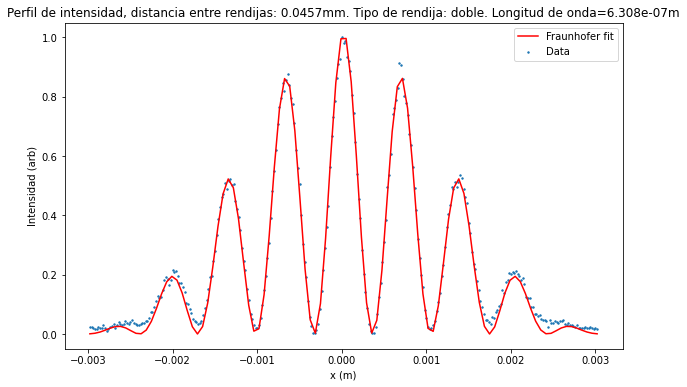

In [107]:
#np.seterr(divide='ignore', invalid='ignore')

def una_rendija(x,longitud_onda,shift,cte_norm):
  A=longitud_onda
  B=shift
  C=cte_norm
  x=x/np.sqrt((x**2) + (D_1**2))
  x=x+B
  arg=np.pi*ancho*x/A
  valor=C*((np.sin(arg))/(arg))**2
  return valor

dis_separacion=[0.356/1000, 0.406/1000, 0.457/1000] #Longitudes en m
d=dis_separacion[2]

def dos_rendijas(x,longitud_onda,shift,cte_norm):
  A=longitud_onda
  B=shift
  C=cte_norm
  x=x/np.sqrt((x**2) + (D_1**2))
  x=x+B
  arg=np.pi*ancho*x/A
  valor=C*(np.cos(np.pi*x*d/A)**2)*((np.sin(arg))/(arg))**2
  return valor



def super_plot(index,llave,modelo):
  #####################
  if modelo=="una rendija":
    func=una_rendija
  if modelo=="dos rendijas":
    func=dos_rendijas
  ### No mover esto ###
  new_x=data(index)["x(mm)"]-data(index)["x(mm)"][data(index)[llave].idxmax()]
  new_x=new_x/1000
  new_y=data(index)[llave]
  new_x=np.array(new_x)
  new_y=np.array(new_y)
  #####################
  popt, pcov = curve_fit(f=func, xdata=new_x , ydata=new_y ,p0=[0.000000555,0.0003,1])
  print(popt)
  longitud_onda,shift,cte_norm=popt
  ####Ploteamos el fit
  plt.figure(figsize=(10,6))
  plt.title("Perfil de intensidad, distancia entre rendijas: "+str(100*dis_separacion[index-1])+"mm. Tipo de rendija: "+llave+". Longitud de onda="+str(np.round(popt[0],10))+"m" )
  x_fit=np.linspace(new_x[0],new_x[len(new_x)-1],100)
  y_fit=func(x_fit , longitud_onda , shift , cte_norm)
  plt.plot(x_fit,y_fit, color="red",label="Fraunhofer fit")
  ####Ploteamos los datos reales
  plt.scatter(new_x,new_y,s=2,label="Data")
  plt.legend()
  plt.ylabel("Intensidad (arb)")
  plt.xlabel("x (m)")
  plt.show()



super_plot(3,"doble","dos rendijas")






In [ ]:
model = Model(f)
  mydata = RealData(new_x, new_y)
  myodr = ODR(mydata, model, beta0=[0.0001, 1.0])
  myoutput = myodr.run()
  BETA=myoutput.beta
  myoutput.pprint()